In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

stocks = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/stocks_2006.dta?raw=true')
stocks.name = "Stocks"

# convert to annual return and std deviation 
annual = pd.DataFrame() # open an empty dataframe
annual['ret'] = (stocks.assign(ret=stocks['ret']+1) # now we have R(t) for each observation
                       .groupby('permno')['ret']    # for each firm,
                       .prod()                      # multiple all the gross returns
                       -1                           # and subtract one to get back to the total period return
)
annual['std'] = stocks.groupby('permno')['ret'].std().mul(np.sqrt(250)) #times sqrt(250) to annualize
annual['year'] = stocks.groupby('permno')['date'].first().dt.year

# get firm information 
# this firm file is like prior, but includes more variables
# investing, financing, industry competition and more!
# VARIABLE DESCRIPTIONS IN README AT: https://github.com/LeDataSciFi/lectures-spr2020/tree/master/assignment_data
firms = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/firms_2006_fuller.dta?raw=true')
firms.name = "Firms"

# merge firm data with annualized stock data
firms = firms.merge(left_on=['lpermno','fyear'], 
            right=annual, right_on=['permno','year'],
            how='inner') 

# and this is a subsample of a few industrys and states
subsample = firms.query('state in ["CA","NY"] & gsector in ["40","45"]') 



### Exercise: Plot returns by industry 

#### Scatterplot GSector and Returns, and use the full sample (firms).

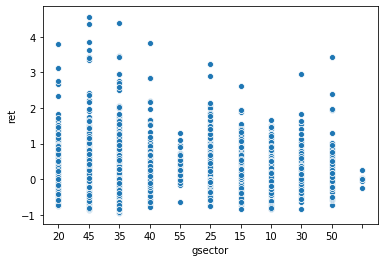

In [4]:
sns.scatterplot(data= firms, x ='gsector', y='ret')

###### Question 1: What is your reaction to this?

EW. Doesn't give any information on ret average of each sector.


###### Question 2: Choose a different graph type to improve it visually.

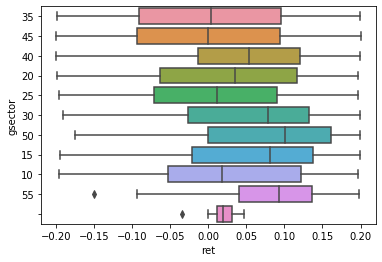

In [14]:
sns.boxplot(data=firms.query("abs(ret)<0.2"), y ='gsector', x='ret')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

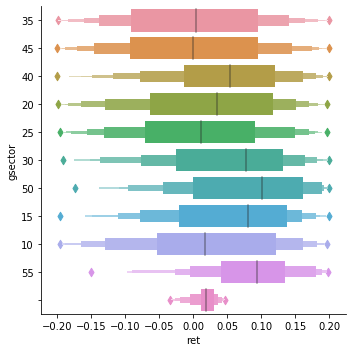

In [10]:
sns.catplot(data=firms.query('abs(ret)<0.2'), y ='gsector', x='ret',kind='boxen')

### Exercise: Plot returns vs. risk 

#### Scatterplot Std and Returns, and use the subsample sample (subsample).

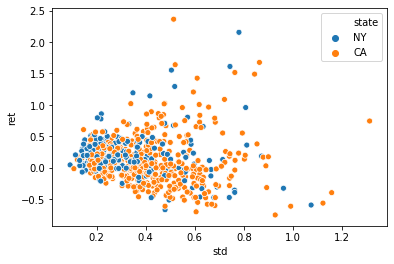

In [23]:
sns.scatterplot(data=subsample.query("std<1.5"),x='std',y='ret',hue='state')

##### Question: How can this be improved?
Facet Grid


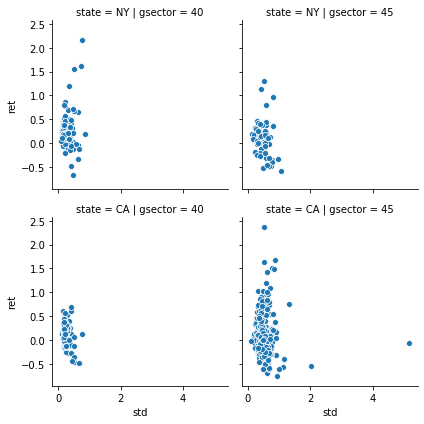

In [27]:
(sns
    .FacetGrid(data=subsample,row='state',col='gsector')
    .map(sns.scatterplot,'std','ret')
)

### Exercise: Plot average returns in the industry 
#### Use the full sample and plot the means as a bar chart.

Question: How can this be improved?

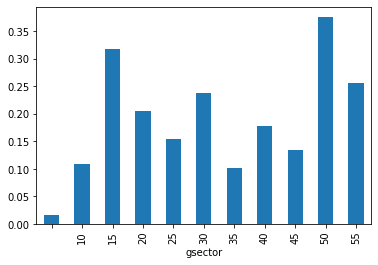

In [28]:
firms.groupby('gsector')['ret'].mean().plot.bar()

### Pair PLot

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


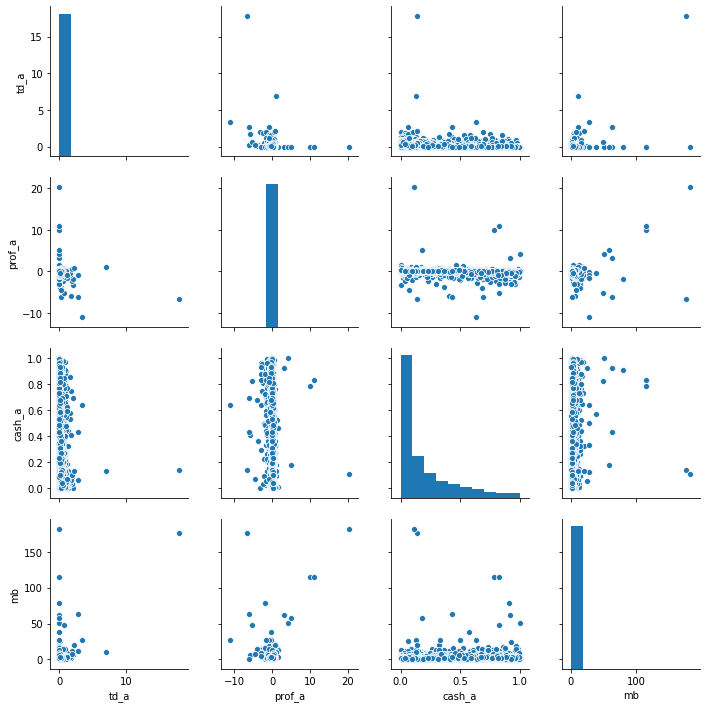

In [29]:
sns.pairplot(data=firms[['td_a','prof_a','cash_a','mb']])